# Player Rating Prediction

In the following program we are trying to predict the overall rating of player .....

In [1]:
##importing all the library
import sqlite3
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
##checking missing values
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [5]:
## imputing missing value
df.dropna(inplace = True)

In [6]:
## checking missing value after imputation
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate    False
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                False
dribbling              False
curve                  False
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                False
reactions              False
balance                False
shot_power             False
jumping                False
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                 False
penalties              False
marking       

In [7]:
## defining target value  
y = df['overall_rating']
y.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [8]:
## drop the ineffective variables
X=df.drop(['id','player_fifa_api_id','player_api_id','date','overall_rating'],axis=1)
X.head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
#scaling the features 
from sklearn import preprocessing
prepro = preprocessing.LabelEncoder()
X.preferred_foot = prepro.fit_transform(X.preferred_foot)
X.attacking_work_rate = prepro.fit_transform(X.attacking_work_rate)
X.defensive_work_rate = prepro.fit_transform(X.defensive_work_rate)
X.head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,1,4,14,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,1,4,14,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,1,4,14,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,1,4,14,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,1,4,14,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [10]:
##splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [11]:
## fitting the model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
## finding the intecept and coeffient
inter = lm.intercept_
coef = lm.coef_
print(coef)
print(inter)

[ 0.37923316  0.00629023 -0.03539174 -0.06913231  0.02190275  0.01149954
  0.06929713  0.04978441  0.00316433 -0.013525    0.0121643   0.01339392
  0.0081625   0.13549844  0.00649903  0.00795384 -0.00856281  0.20993424
  0.00968976  0.01794672  0.01587475 -0.00666777  0.06245745 -0.01379948
  0.01879501  0.01184691 -0.01021619 -0.00284428  0.01403119  0.0332451
  0.00445168 -0.02979473  0.16189235  0.0344211  -0.03360542  0.05641428
  0.02419504]
-2.58753558895


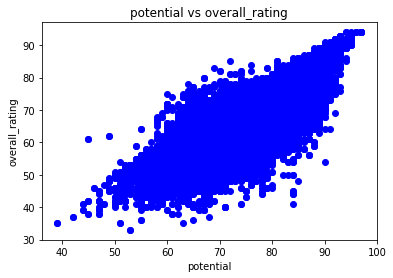

In [13]:
##plotting the relation of potential vs overall_rating 
import matplotlib.pyplot as plt
plt.scatter(X.potential,y,c='b')
plt.xlabel("potential")
plt.ylabel("overall_rating")
plt.title("potential vs overall_rating")
plt.show()


In [14]:
# make predictions for those x values and store them
preds = lm.predict(X_test)
preds

array([ 54.50595621,  61.82438879,  77.85291646, ...,  74.40302772,
        72.8101257 ,  58.90750303])

In [15]:
#MSE 
print (np.mean((y_test-preds) ** 2))

7.829442375395248


In [17]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = preds))
RMSE

2.7981140747645075

In [18]:
# Let's try XGboost algorithm to see if we can get better results
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [19]:
#fitting the Xgboost method
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [20]:
#predicting rating of players via Xgboost
xgpred = xgb.predict(X_test)
xgpred

array([ 60.92725754,  63.36790085,  78.75823975, ...,  76.41306305,
        74.03507233,  57.88198471], dtype=float32)

In [21]:
#improved MSE
print (np.mean((y_test-xgpred) ** 2))

1.5707486114008498


In [22]:
#improved RMSE
improved_RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = xgpred))
improved_RMSE

1.253295101482827

In [23]:
#calculating prediction scores of diffrent model with y_test
from sklearn.metrics import explained_variance_score
print(explained_variance_score(preds,y_test))
print(explained_variance_score(xgpred,y_test))

0.813521550816
0.966928544433
